In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
### Load training data
training_data_raw = []
training_label = []
test_data_name = []
test_data = []

for dirname, _, filenames in os.walk('/kaggle/input/cs-ioc5008-hw1/dataset/dataset/train'):
    for filename in filenames:
        label = dirname.split('/')
        training_label.append(label[7])
        image = plt.imread(os.path.join(dirname, filename))
        training_data_raw.append(image)
        
training_data_length = len(training_label)
training_data = training_data_raw

### Load test data
for dirname, _, filenames in os.walk('/kaggle/input/cs-ioc5008-hw1/dataset/dataset/test'):
    for filename in filenames:
        test_data_name.append(filename)
        image = plt.imread(os.path.join(dirname, filename))
        test_data.append(image)

#print(len(test_data))
#print(test_data_name[123])
#image = test_data[123]
#plt.imshow(image, cmap='gray')
#plt.show()
print("Number of training data =", len(training_data))
print("Number of test data =", len(test_data))
n_classes = len(np.unique(training_label))
print("Number of classes =", n_classes)

#for image in training_data:
#    image_shape = image.shape
#    print("Image data shape =", image_shape)

#index = 320
#image = training_data[index]
#plt.imshow(image, cmap='gray')
#plt.show()
#print(training_label[index])

#print(type(image))
#print(image)
#training_data = (training_data - 128.0) / 128.0

#index = 100
#image = training_data[index]
#plt.imshow(image, cmap='gray')
#plt.show()
#print(training_label[index])

#training_data, training_label = shuffle(training_data, training_label)

#index = 100
#image = training_data[index]
#plt.imshow(image, cmap='gray')
#plt.show()
#print(training_label[index])"""

Number of training data = 2819
Number of test data = 1040
Number of classes = 13


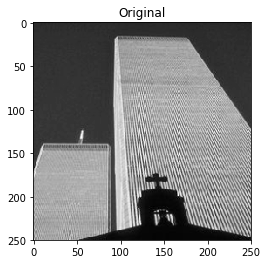

[[ 39  40  40 ...  40  38  36]
 [ 41  41  42 ...  40  38  38]
 [ 43  43  44 ...  39  39  39]
 ...
 [170 149 155 ...  21  17  20]
 [131 180 135 ...  16  14  17]
 [103 204 125 ...   2  23  16]]
(250, 250)


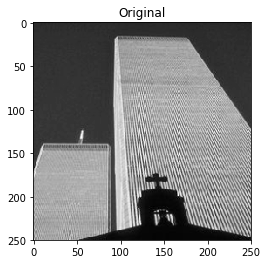

[[-0.6953125 -0.6875    -0.6875    ... -0.6875    -0.703125  -0.71875  ]
 [-0.6796875 -0.6796875 -0.671875  ... -0.6875    -0.703125  -0.703125 ]
 [-0.6640625 -0.6640625 -0.65625   ... -0.6953125 -0.6953125 -0.6953125]
 ...
 [ 0.328125   0.1640625  0.2109375 ... -0.8359375 -0.8671875 -0.84375  ]
 [ 0.0234375  0.40625    0.0546875 ... -0.875     -0.890625  -0.8671875]
 [-0.1953125  0.59375   -0.0234375 ... -0.984375  -0.8203125 -0.875    ]]
(250, 250)


In [2]:
### Data Preprocess
import cv2
def display_one(a, title1="Original"):
    plt.imshow(a, cmap='gray')
    plt.title(title1)
    #plt.xticks([])
    #plt.yticks([])
    plt.show()
    
def display(a, b, title1="Original", title2="Edited"):
    plt.subplot(121)
    plt.imshow(a, cmap='gray')
    plt.title(title1)
    #plt.xticks([])
    #plt.yticks([])
    plt.subplot(122)
    plt.imshow(b, cmap='gray')
    plt.title(title2)
    #plt.xticks([])
    #plt.yticks([])
    plt.show()
    
def processing(image_data):
    #img = [data[123], data[1054], data[156]]
    #print("Original size:", img[1].shape)
    #print(training_label[1054])
    #original = img[1]
    #display_one(original)
    
    height = 250
    width = 250
    dim = (width, height)
    res_img = []
    
    for i in range(len(image_data)):
        res = cv2.resize(image_data[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)
    
    return res_img
    #print("RESIZED", res_img[1].shape)
    
    #original = res_img[1]
    #display_one(original)

img = training_data[25]
#display_one(img)
#print(img.shape)
resize_data = processing(training_data)
#print(len(resize_data))

img = resize_data[25]
display_one(img)
print(img)
print(img.shape)

### Normalization
for i in range(len(resize_data)):
    resize_data[i] = (resize_data[i] - 128.0) / 128.0
    
img = resize_data[25]
display_one(img)
print(img)
print(img.shape)

In [3]:
### Data Augmentation
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

augmented_data = resize_data.copy()
augmented_data_label = training_label.copy()
#print(len(augmented_data))
#print(len(augmented_data_label))
#testing_image = resize_data[2053]
#print(training_label[2053])
#print(type(testing_image))
#display_one(testing_image)
#aug_image = horizontal_flip(testing_image)
#display_one(aug_image)

# dictionary of the transformations functions we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}

# random num of transformations to apply
#print(len(available_transformations))
#total = 0
#print(num_transformations_to_apply)

for i in range(9200):
    index = random.randint(1, len(resize_data)-1)
    current_image_label = training_label[index]
    
    num_transformations_to_apply = random.randint(1, len(available_transformations))
    
    #total += (num_transformations_to_apply + 1)
    
    num_transformations = 0
    while num_transformations <= num_transformations_to_apply:
        # choose a random transformation to apply for a single image
        key = random.choice(list(available_transformations))
        #print(key)
        transformed_image = available_transformations[key](resize_data[index])
        augmented_data.append(transformed_image)
        augmented_data_label.append(current_image_label)
        #display_one(transformed_image)
        num_transformations += 1

#print(total)
#print(len(resize_data))
#print(len(training_label))   
print(len(augmented_data))
print(len(augmented_data_label))        
#display_one(resize_data[index])
#print(training_label[index])

30492
30492


In [4]:
### Model Architecture
def scene_classification_model(x):
    mu = 0.0
    sigma = 0.1
    dropout = 0.75
    
    # Layer 1: Convolutional. Input = 250x250xNone. Output = 244x244x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(7, 7, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, dropout)
    # Pooling. Input = 244x244x6. Output = 122x122x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv1 = tf.nn.dropout(conv1, dropout)

    # Layer 2: Convolutional. Output = 116x116x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(7, 7, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, dropout)
    # Pooling. Input = 116x116x16. Output = 58x58x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv2 = tf.nn.dropout(conv2, dropout)
    
    # Layer 3: Convolutional. Output = 52x52x24.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(7, 7, 16, 24), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(24))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    # Activation.
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.dropout(conv3, dropout)
    # Pooling. Input = 52x52x24. Output = 26x26x24.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv3 = tf.nn.dropout(conv3, dropout)
    
    # Layer 4: Convolutional. Output = 20x20x32.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(7, 7, 24, 32), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(32))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    # Activation.
    conv4 = tf.nn.relu(conv4)
    conv4 = tf.nn.dropout(conv4, dropout)
    # Pooling. Input = 20x20x32. Output = 10x10x32.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv4 = tf.nn.dropout(conv4, dropout)
    
    # Layer 5: Convolutional. Output = 6x6x40.
    conv5_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 40), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(40))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='VALID') + conv5_b
    # Activation.
    conv5 = tf.nn.relu(conv5)
    conv5 = tf.nn.dropout(conv5, dropout)
    # Pooling. Input = 6x6x40. Output = 3x3x40.
    conv5 = tf.nn.max_pool(conv5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv5 = tf.nn.dropout(conv5, dropout)

    # Flatten. Input = 3x3x40. Output = 360.
    fc0   = flatten(conv5)
    
    # Layer 6: Fully Connected. Input = 360. Output = 108.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(360, 108), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(108))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    #fc1 = tf.nn.dropout(tf.nn.relu(fc1), dropout)

    # Layer 7: Fully Connected. Input = 108. Output = 40.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(108, 40), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(40))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    #fc2 = tf.nn.dropout(tf.nn.relu(fc2), dropout)

    # Layer 8: Fully Connected. Input = 40. Output = 13.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(40, 13), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(13))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#display_one(augmented_data[100])
#print(augmented_data_label[100])
#print(augmented_data[0].shape)

#augmented_data, augmented_data_label = shuffle(augmented_data, augmented_data_label)
for i in range(len(augmented_data)):
    augmented_data[i] = augmented_data[i].reshape(250, 250, 1)
#scene_classification_model()
#print(augmented_data[0].shape)
#display_one(augmented_data[100])
#print(augmented_data_label[100])
scene_number = {
    'bedroom': 0,
    'coast': 1,
    'forest': 2,
    'highway': 3,
    'insidecity': 4,
    'kitchen': 5,
    'livingroom': 6,
    'mountain': 7,
    'office': 8,
    'opencountry': 9,
    'street': 10,
    'suburb': 11,
    'tallbuilding': 12
}

augmented_data_label_number = []

for label in augmented_data_label:
    augmented_data_label_number.append(scene_number[label])
#print(augmented_data_label)
print(len(augmented_data_label_number))
#print(augmented_data_label_number)

30492


In [6]:
### Train model
from sklearn.utils import shuffle
import tensorflow as tf
# Hyperparameters
EPOCHS = 55
BATCH_SIZE = 128
rate = 0.001

x = tf.placeholder(tf.float32, (None, 250, 250, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 13)
keep_prob = tf.placeholder(tf.float32)

logits = scene_classification_model(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(data, label):
    num_examples = len(data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = data[offset:offset+BATCH_SIZE], label[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y})
        total_loss += (loss * len(batch_x))
        total_accuracy += (accuracy * len(batch_x))
    return total_loss / num_examples, total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(augmented_data)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        augmented_data, augmented_data_label_number = shuffle(augmented_data, augmented_data_label_number)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = augmented_data[offset:end], augmented_data_label_number[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        train_loss, train_accuracy = evaluate(augmented_data, augmented_data_label_number)
        print("EPOCH {} ...".format(i + 1))
        print("Train loss = {:.3f}".format(train_loss))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print()
    
    saver.save(sess, './scene_model')
    print("Model saved")
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.')) 

Training...

EPOCH 1 ...
Train loss = 2.276
Train Accuracy = 0.199

EPOCH 2 ...
Train loss = 1.679
Train Accuracy = 0.411

EPOCH 3 ...
Train loss = 1.341
Train Accuracy = 0.530

EPOCH 4 ...
Train loss = 1.164
Train Accuracy = 0.600

EPOCH 5 ...
Train loss = 0.994
Train Accuracy = 0.657

EPOCH 6 ...
Train loss = 0.857
Train Accuracy = 0.704

EPOCH 7 ...
Train loss = 0.792
Train Accuracy = 0.727

EPOCH 8 ...
Train loss = 0.724
Train Accuracy = 0.748

EPOCH 9 ...
Train loss = 0.670
Train Accuracy = 0.768

EPOCH 10 ...
Train loss = 0.639
Train Accuracy = 0.779

EPOCH 11 ...
Train loss = 0.535
Train Accuracy = 0.812

EPOCH 12 ...
Train loss = 0.524
Train Accuracy = 0.815

EPOCH 13 ...
Train loss = 0.511
Train Accuracy = 0.821

EPOCH 14 ...
Train loss = 0.492
Train Accuracy = 0.830

EPOCH 15 ...
Train loss = 0.388
Train Accuracy = 0.865

EPOCH 16 ...
Train loss = 0.395
Train Accuracy = 0.863

EPOCH 17 ...
Train loss = 0.361
Train Accuracy = 0.876

EPOCH 18 ...
Train loss = 0.359
Train Accura

In [7]:
test_data_reshape = processing(test_data)

for i in range(len(test_data_reshape)):
    test_data_reshape[i] = (test_data_reshape[i] - 128.0) / 128.0
    
for i in range(len(test_data_reshape)):
    test_data_reshape[i] = test_data_reshape[i].reshape(250, 250, 1)
print(len(test_data_reshape))
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    out = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict = {x: test_data_reshape})
print (out)

scene_detail = ["bedroom", "coast", "forest", "highway", "insidecity", "kitchen", "livingroom", "mountain", "office", "opencountry", "street", "suburb", "tallbuilding"]

1040
TopKV2(values=array([[9.9999988e-01, 1.6834409e-07, 1.9112219e-08, 1.3887354e-08,
        9.8272883e-09],
       [8.3086628e-01, 9.3095787e-02, 4.5571934e-02, 2.3010893e-02,
        4.0023085e-03],
       [9.9443829e-01, 3.3116452e-03, 2.2304351e-03, 1.9073337e-05,
        5.2455550e-07],
       ...,
       [9.9999928e-01, 7.6023190e-07, 7.6319168e-10, 7.3277368e-10,
        2.7725400e-10],
       [9.2939502e-01, 7.0593573e-02, 1.1327347e-05, 5.7488837e-08,
        2.2319178e-09],
       [9.9999988e-01, 6.4629674e-08, 3.5010614e-09, 2.7973318e-10,
        1.3008801e-10]], dtype=float32), indices=array([[12,  8,  2,  7,  4],
       [ 8,  6,  4, 12,  0],
       [ 9,  3, 11,  1,  4],
       ...,
       [10,  3,  9,  6, 11],
       [ 8,  0,  5,  6, 12],
       [12, 10,  7,  4,  8]], dtype=int32))


In [8]:
#print(len(out[1]))
#for i in range(len(out[1])):
#    print (":".format(i+1), scene_detail[out[1][i][0]])
#    print ()
print("id,label")
for i in range(len(out[1])):
    name_arr = test_data_name[i].split('.')
    name = name_arr[0]
    print(name+","+scene_detail[out[1][i][0]])

id,label
image_0547,tallbuilding
image_0334,office
image_0427,opencountry
image_0705,opencountry
image_0115,street
image_0275,insidecity
image_0653,livingroom
image_0451,tallbuilding
image_0443,street
image_0447,insidecity
image_0291,livingroom
image_0878,forest
image_0888,forest
image_0468,street
image_0718,coast
image_0902,suburb
image_0661,office
image_0932,opencountry
image_0518,suburb
image_0296,tallbuilding
image_0763,suburb
image_0356,forest
image_0823,tallbuilding
image_0208,suburb
image_0681,opencountry
image_0128,suburb
image_0896,mountain
image_0255,highway
image_0638,coast
image_0626,kitchen
image_0977,highway
image_0604,suburb
image_0332,suburb
image_0181,kitchen
image_0839,forest
image_0116,livingroom
image_0043,livingroom
image_0183,livingroom
image_0516,office
image_0995,office
image_0197,office
image_0325,street
image_0667,opencountry
image_0868,insidecity
image_0965,mountain
image_0003,bedroom
image_0060,forest
image_0105,opencountry
image_0319,highway
image_0641,offi